# Paths

In [1]:
import pandas as pd
from tvi_footballindex.parsing import f24_parser
from tvi_footballindex.tvi import calculator

In [2]:
f24_file_path = "data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv"

# Processing

In [3]:
# 1. Parse F24 data
match_events = f24_parser.parsef24_csv(f24_file_path)
match_events.head()

Processing: data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv


,game_id,period,minute,second,expanded_minute,event_name,outcome_type,team_id,team,player_id,player,x,y,end_x,end_y,goal_mouth_y,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id,id
0,1836567,FirstHalf,0,0.0,0,Start,Successful,296,Sporting,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN,0
1,1836567,FirstHalf,0,0.0,0,Start,Successful,121,Rio Ave,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN,1
2,1836567,FirstHalf,0,0.0,0,Pass,Successful,121,Rio Ave,436559.0,Clayton,49.9,50.5,39.3,46.4,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'Length', 'value': 2...",True,NaN,NaN,NaN,NaN,NaN,2
3,1836567,FirstHalf,0,3.0,0,Pass,Unsuccessful,121,Rio Ave,149468.0,Amine Oudrhiri,44.3,51.8,67.8,89.4,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN,3
4,1836567,FirstHalf,0,5.0,0,Pass,Unsuccessful,296,Sporting,509068.0,Geovany Quenda,30.9,4.6,45.7,0.0,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN,4


In [4]:
# 2. Calculate player playtime
print("Calculating player playtime...")
play_time = f24_parser.calculate_player_playtime(match_events, min_playtime=30, from_processed=True)
play_time.head()

Calculating player playtime...
Empty DataFrame
Columns: [game_id, team_id, player_id, position, start_time]
Index: []


TypeError: 'NoneType' object is not subscriptable

In [17]:
play_time[play_time['player_id'] == '408941']

,game_id,team_id,player_id,position,play_time
1535,1836710,2188,408941,Midfielder,90.0
1646,1836722,2188,408941,Midfielder,90.0
1910,1836729,2188,408941,Midfielder,90.0
2042,1836784,2188,408941,Midfielder,90.0
2295,1836790,2188,408941,Midfielder,90.0
...,...,...,...,...,...
5628,1836756,2188,408941,Midfielder,90.0
5881,1836763,2188,408941,Midfielder,90.0
6122,1836750,2188,408941,Midfielder,90.0
6496,1836795,2188,408941,Midfielder,90.0


## Get Actions


Ações Defensivas
*   Interceção
*   Desarme (com sucesso)
*   Duelo aéreo ganho


Ações de Construção

*   Passe progressivo
*   Drible

Ações ofensivas
*   Passes chave
*   Deep completition (incluindo cruzamentos)
*   Remate à baliza





In [6]:
# Defensive Actions
interceptions = f24_parser.get_interceptions(match_events, from_processed=True)
tackles = f24_parser.get_tackles(match_events, from_processed=True)
aerials = f24_parser.get_aerials(match_events, from_processed=True)

# Possession Actions
progressive_passes = f24_parser.get_progressive_passes(match_events, from_processed=True)
dribbles = f24_parser.get_dribbles(match_events, from_processed=True)

# Offensive Actions
key_passes = f24_parser.get_key_passes(match_events, from_processed=True)
deep_completions = f24_parser.get_deep_completions(match_events, from_processed=True)
shots_on_target = f24_parser.get_shots_on_target(match_events, from_processed=True)

C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progressive_passes['event_name'] = 'progressive_pass'
C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:802: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_completion['event_name'] = 'deep_completion'
C:\Users\ldoutors\OneDrive - C

In [13]:
# Combine all actions into a single DataFrame
all_metric_events = pd.concat([
    interceptions, tackles, aerials, progressive_passes, dribbles, key_passes, deep_completions, shots_on_target
])
all_metric_events['player_id'] = all_metric_events['player_id'].astype(int).astype(str)
all_metric_events

,game_id,team_id,player_id,event_name,x,y
0,1836567,296,425093,Interception,48.1,82.4
1,1836567,121,125953,Interception,26.7,33.3
2,1836567,121,362651,Interception,20.7,5.4
3,1836567,121,149468,Interception,55.4,22.9
4,1836567,121,362651,Interception,18.3,29.7
...,...,...,...,...,...,...
2445,1836819,251,397849,shots_on_target,78.1,57.4
2446,1836819,263,322631,shots_on_target,88.5,50.0
2447,1836819,251,531769,shots_on_target,94.5,56.3
2448,1836809,296,344378,shots_on_target,87.6,55.5


## Calculate Metric (TVI)

The TVI (Tactical Versatility Index) metric is calculated as follows:

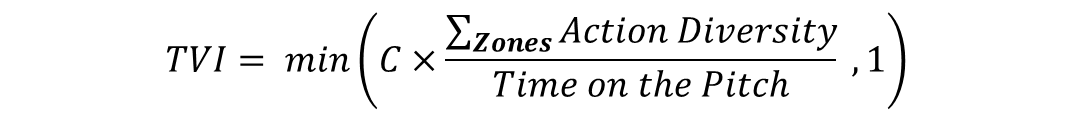

Where the action diversity is how many of the above mentioned actions the player did on that game. Only 1 action per type of action is considered.

C is the normalization constant, which in this case is 90/44 ~ 2.05, where 90 is the duration of a game, and 44 is the maximum number of possible distinct actions (pairs action, zone).

In [15]:
# Calculate TVI with the custom grid
tvi_df = calculator.calculate_tvi(
    all_metric_events, 
    play_time
)
tvi_df

,game_id,team_id,player_id,Aerial_1,Aerial_2,Aerial_3,Aerial_4,Aerial_5,Aerial_6,Interception_1,Interception_2,Interception_3,Interception_4,Interception_5,Interception_6,Tackle_1,Tackle_2,Tackle_3,Tackle_4,Tackle_5,Tackle_6,deep_completion_1,deep_completion_2,deep_completion_3,deep_completion_4,deep_completion_5,deep_completion_6,dribble_1,dribble_2,dribble_3,dribble_4,dribble_5,dribble_6,key_pass_1,key_pass_2,key_pass_3,key_pass_4,key_pass_5,key_pass_6,progressive_pass_1,progressive_pass_2,progressive_pass_3,progressive_pass_4,progressive_pass_5,progressive_pass_6,shots_on_target_1,shots_on_target_2,shots_on_target_3,shots_on_target_4,shots_on_target_5,shots_on_target_6,action_diversity,position,play_time,TVI
0,1836567,296,376862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Goalkeeper,90.0,0.022727
1,1836567,296,509068,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Midfielder,90.0,0.181818
2,1836567,296,425093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Midfielder,90.0,0.113636
3,1836567,296,395992,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Defender,90.0,0.113636
4,1836567,296,443663,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Defender,90.0,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,1836809,107,395962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Midfielder,90.0,0.090909
6728,1836809,107,472325,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Midfielder,90.0,0.113636
6729,1836809,107,68855,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Forward,90.0,0.068182
6730,1836809,107,362386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Midfielder,90.0,0.045455


# Results deep dive

In [ ]:
# filter out players with small playing time
time_threshold = 450 # minutes -> 5 full matches
tvi_final_wNames_filtered = tvi_final_wNames[tvi_final_wNames['play_time'] > time_threshold]\
  .sort_values('TVI', ascending=False).reset_index(drop=True)
tvi_final_wNames_filtered.head(20)

,player_id,player_name,team_ids,team_name,position,birth_date,nationality,height,weight,join_date,action_diversity,play_time,TVI,defensive_zone_1,progressive_zone_1,offensive_zone_1,defensive_zone_2,progressive_zone_2,offensive_zone_2,defensive_zone_3,progressive_zone_3,offensive_zone_3,defensive_zone_4,progressive_zone_4,offensive_zone_4,defensive_zone_5,progressive_zone_5,offensive_zone_5,defensive_zone_6,progressive_zone_6,offensive_zone_6
0,131416,Gabriel Pires,251.0,Benfica,Midfielder,1993-09-18,Brazil,187,82,2018-08-27,10.560948,886.0,0.313975,0.314898,0.518059,0.000000,0.510158,0.551919,0.000000,0.835214,2.340858,0.310384,2.843115,3.668172,0.162528,0.296840,0.203160,0.609481,0.630926,1.293454,0.416479
1,39765,Adel Taarabt,251.0,Benfica,Midfielder,1989-05-24,Morocco,185,77,2015-07-01,8.956037,1524.0,0.241589,0.133858,0.192913,0.049213,0.645013,0.288058,0.000000,0.234908,2.596457,0.176509,0.783465,3.063648,0.186352,0.154199,0.596457,0.971129,0.260499,2.013780,1.414042
2,203323,Carlos Valenzuela,6644.0,FC Famalicão,Midfielder,1997-04-22,Argentina,167,69,2020-08-03,8.599436,709.0,0.239454,0.000000,0.279267,0.000000,1.160790,0.100141,0.000000,0.100141,0.645980,0.126939,0.939351,1.234133,0.369535,0.000000,0.480959,0.449929,0.462623,2.860367,1.622003
3,154306,Iuri Medeiros,372.0,Sporting Braga,Midfielder,1994-07-10,Portugal,175,66,2020-08-03,8.224176,910.0,0.236014,0.000000,0.098901,0.000000,0.548352,0.116484,0.000000,0.049451,0.762637,0.071429,0.979121,1.531868,0.068132,0.090110,0.431868,0.700000,0.278022,2.675824,3.510989
4,120188,Otávio,201.0,FC Porto,Midfielder,1995-02-09,Brazil,171,65,2014-09-01,9.579131,2003.0,0.232833,0.295057,0.174738,0.000000,0.419870,0.084373,0.000000,0.292561,1.393410,0.253620,0.840739,3.471293,0.256615,0.216176,0.686470,1.368447,0.711433,3.364953,3.076885
5,179531,Éverton,251.0,Benfica,Forward,1996-03-22,Brazil,174,72,2020-08-14,8.108388,1836.0,0.223930,0.049020,0.049020,0.000000,0.347495,0.045207,0.000000,0.185730,0.531590,0.049020,1.474946,2.467320,0.174837,0.160675,0.424837,0.942266,0.000000,2.994009,2.704793
6,56491,Nicolás Gaitán,372.0,Sporting Braga,Midfielder,1988-02-23,Argentina,173,66,2020-08-11,7.006397,469.0,0.222427,0.000000,0.000000,0.000000,0.000000,0.157783,0.000000,0.174840,1.072495,0.633262,0.624733,2.439232,0.206823,0.066098,0.680171,0.471215,0.786780,3.773987,5.036247
7,78638,Sérgio Oliveira,201.0,FC Porto,Midfielder,1992-06-02,Portugal,181,72,2015-07-01,8.997297,2220.0,0.220209,0.193694,0.157207,0.000000,0.198649,0.222072,0.000000,0.182883,1.368468,0.191892,1.101351,2.344144,0.503604,0.274775,0.200000,1.482432,0.300000,3.346396,3.563063
8,116631,Gilberto,251.0,Benfica,Defender,1993-03-07,Brazil,181,74,2020-08-08,8.542069,1450.0,0.220063,0.580000,0.057241,0.062069,1.683448,0.574483,0.000000,0.000000,0.208276,0.000000,1.759310,4.047586,0.098621,0.124138,0.062069,0.288966,0.475172,2.824828,2.379310
9,210237,Marko Grujic,201.0,FC Porto,Midfielder,1996-04-13,Serbia,191,86,2020-10-06,7.836391,654.0,0.215805,0.250765,0.000000,0.000000,0.631498,0.000000,0.000000,0.470948,1.836391,0.000000,3.295107,2.925076,0.126911,1.420489,0.163609,1.128440,0.623853,0.310398,0.402141


In [ ]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI']].head(20)

,player_name,team_name,position,action_diversity,play_time,TVI
0,Gabriel Pires,Benfica,Midfielder,10.560948,886.0,0.313975
1,Adel Taarabt,Benfica,Midfielder,8.956037,1524.0,0.241589
2,Carlos Valenzuela,FC Famalicão,Midfielder,8.599436,709.0,0.239454
3,Iuri Medeiros,Sporting Braga,Midfielder,8.224176,910.0,0.236014
4,Otávio,FC Porto,Midfielder,9.579131,2003.0,0.232833
5,Éverton,Benfica,Forward,8.108388,1836.0,0.223930
6,Nicolás Gaitán,Sporting Braga,Midfielder,7.006397,469.0,0.222427
7,Sérgio Oliveira,FC Porto,Midfielder,8.997297,2220.0,0.220209
8,Gilberto,Benfica,Defender,8.542069,1450.0,0.220063
9,Marko Grujic,FC Porto,Midfielder,7.836391,654.0,0.215805


In [ ]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI']].sort_values('action_diversity', ascending=False).head(20)

,player_name,team_name,position,action_diversity,play_time,TVI
0,Gabriel Pires,Benfica,Midfielder,10.560948,886.0,0.313975
4,Otávio,FC Porto,Midfielder,9.579131,2003.0,0.232833
12,Ryan Gauld,SC Farense,Midfielder,9.215508,2863.0,0.213619
7,Sérgio Oliveira,FC Porto,Midfielder,8.997297,2220.0,0.220209
1,Adel Taarabt,Benfica,Midfielder,8.956037,1524.0,0.241589
16,Jonatan Lucca,SC Farense,Midfielder,8.779510,1796.0,0.209557
10,Pedrinho,Gil Vicente,Midfielder,8.708840,1233.0,0.214001
29,Rúben Lima,Belenenses,Defender,8.639016,2845.0,0.198434
17,Willyan,Portimonense,Defender,8.634761,2382.0,0.209526
2,Carlos Valenzuela,FC Famalicão,Midfielder,8.599436,709.0,0.239454


# Views

In [ ]:
!pip install matplotsoccer
import matplotsoccer
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for matplotsoccer: filename=matplotsoccer-0.0.8-py3-none-any.whl size=5966 sha256=67d365d1426dc15b493276edf19fca06a375b5534e72765b51c8d68071652e15
  Stored in directory: /root/.cache/pip/wheels/5f/96/51/a91e3de14cbbb035d664ca08bf412678bda3e5c7864f9ba66d
Successfully built matplotsoccer


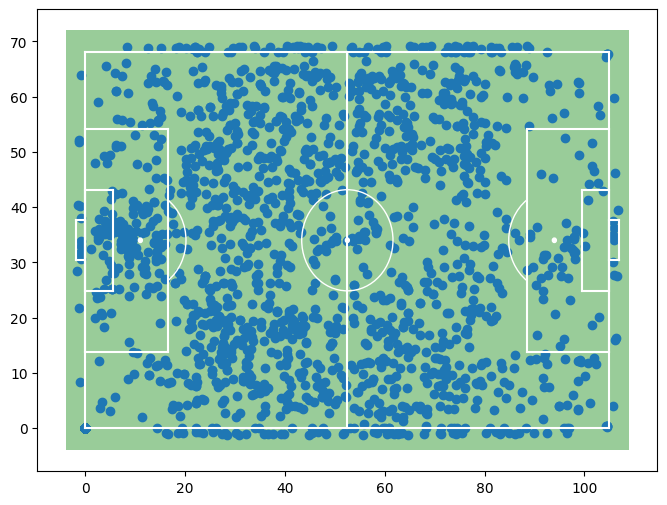

In [ ]:
matplotsoccer.field("green",figsize=8, show=False)
plt.scatter(match_events['x']*105/100,match_events['y']*68/100)
plt.axis("on")
plt.show()

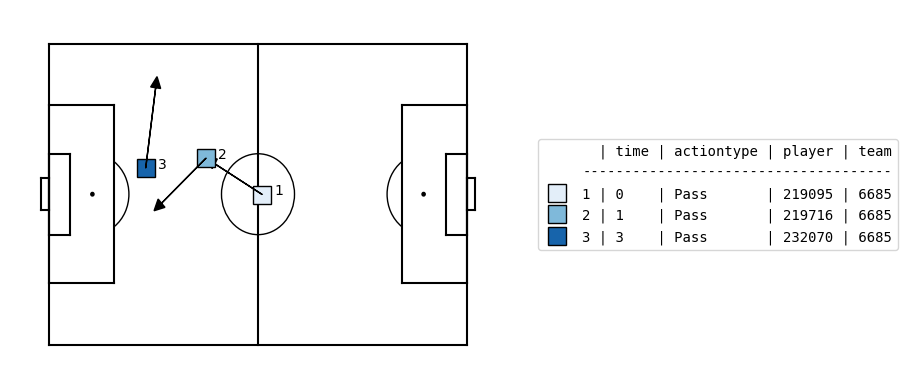

In [ ]:
passes = explode_event(match_events, 1, 0.15)
passes['end_x'] = passes["Pass End X"].astype('float')*105/100
passes['end_y'] = passes["Pass End Y"].astype('float')*68/100
passes['start_x'] = passes["x"].astype('float')*105/100
passes['start_y'] = passes["y"].astype('float')*68/100
actions_df = passes.head(3)
matplotsoccer.actions(
    location=actions_df[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions_df.event_name,
    team=actions_df.team_id,
    result= actions_df.outcome == '1',
    label=actions_df[["sec", "event_name", "player_id", "team_id"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)